Submitted By: Ashwini Sanku, M2021ANLT007, TISS Analytics

# Machine Learning Project - Prediction of Patient Survival


## Part 1: General Data Preprocessing 

In [2]:
#Importing necessary libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import plotly.express as px
import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot

from scipy import stats
from scipy.stats import norm, skew, boxcox
import statsmodels.formula.api as sm
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [3]:
#Reading the data from current working directory
df = pd.read_csv("C:/Users/ashwi/Downloads/Sem 3/ML/heart_failure_clinical_records_dataset.csv")

In [4]:
#Glancing through the data 
df.head(5)

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

In [5]:
#Checking the number of rows and columns in the dataframe

rows_df=df.shape[0]
cols_df=df.shape[1]
print("Number of Rows in the dataframe are %d "%rows_df)
print("Number of columns in the dataframe are %d "%cols_df)

Number of Rows in the dataframe are 299 
Number of columns in the dataframe are 13 


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
df.describe().T

count           mean           std      min  \
age                       299.0      60.833893     11.894809     40.0   
anaemia                   299.0       0.431438      0.496107      0.0   
creatinine_phosphokinase  299.0     581.839465    970.287881     23.0   
diabetes                  299.0       0.418060      0.494067      0.0   
ejection_fraction         299.0      38.083612     11.834841     14.0   
high_blood_pressure       299.0       0.351171      0.478136      0.0   
platelets                 299.0  263358.029264  97804.236869  25100.0   
serum_creatinine          299.0       1.393880      1.034510      0.5   
serum_sodium              299.0     136.625418      4.412477    113.0   
sex                       299.0       0.648829      0.478136      0.0   
smoking                   299.0       0.321070      0.467670      0.0   
time                      299.0     130.260870     77.614208      4.0   
DEATH_EVENT               299.0       0.321070      0.467670      0.0   

                               25%       50%       75%       max  
age                           51.0      60.0      70.0      95.0  
anaemia                        0.0       0.0       1.0       1.0  
creatinine_phosphokinase     116.5     250.0     582.0    7861.0  
diabetes                       0.0       0.0       1.0       1.0  
ejection_fraction             30.0      38.0      45.0      80.0  
high_blood_pressure            0.0       0.0       1.0       1.0  
platelets                 212500.0  262000.0  303500.0  850000.0  
serum_creatinine               0.9       1.1       1.4       9.4  
serum_sodium                 134.0     137.0     140.0     148.0  
sex                            0.0       1.0       1.0       1.0  
smoking                        0.0       0.0       1.0       1.0  
time                          73.0     115.0     203.0     285.0  
DEATH_EVENT                    0.0       0.0       1.0       1.0

The mean of the "DEATH_EVENT" varible, is 0.32, indicating that 32 percent of the observations in the dataset have DEATH_EVENT equal to 1.
Therefore the baseline accuracy is 68 percent and the model we build should definitely beat this baseline benchmark.
Additionally, the dataset has a mild degree of class imbalance so accuracy alone is not sufficient to determine model performance.
The features creatine_phosphokinase and platelets have huge variation compared to other features.
Age ranges from 40 to 95 with a mean of 60. So the dataset is skewed towards an older population.
The mean of the sex variable is 0.65 indicating that it is skewed towards males (sex=1)

In [8]:
#Checking for Null values 
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [9]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [10]:
cat_features = ['anaemia', 'diabetes', 'high_blood_pressure','sex', 'smoking' ]
num_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

In [11]:
df[num_features].describe().T

count           mean           std      min  \
age                       299.0      60.833893     11.894809     40.0   
creatinine_phosphokinase  299.0     581.839465    970.287881     23.0   
ejection_fraction         299.0      38.083612     11.834841     14.0   
platelets                 299.0  263358.029264  97804.236869  25100.0   
serum_creatinine          299.0       1.393880      1.034510      0.5   
serum_sodium              299.0     136.625418      4.412477    113.0   
time                      299.0     130.260870     77.614208      4.0   

                               25%       50%       75%       max  
age                           51.0      60.0      70.0      95.0  
creatinine_phosphokinase     116.5     250.0     582.0    7861.0  
ejection_fraction             30.0      38.0      45.0      80.0  
platelets                 212500.0  262000.0  303500.0  850000.0  
serum_creatinine               0.9       1.1       1.4       9.4  
serum_sodium                 134.0     137.0     140.0     148.0  
time                          73.0     115.0     203.0     285.0

All the numeric features above have a very wide distribution. We need to normalize the data in order for our models to perform well.

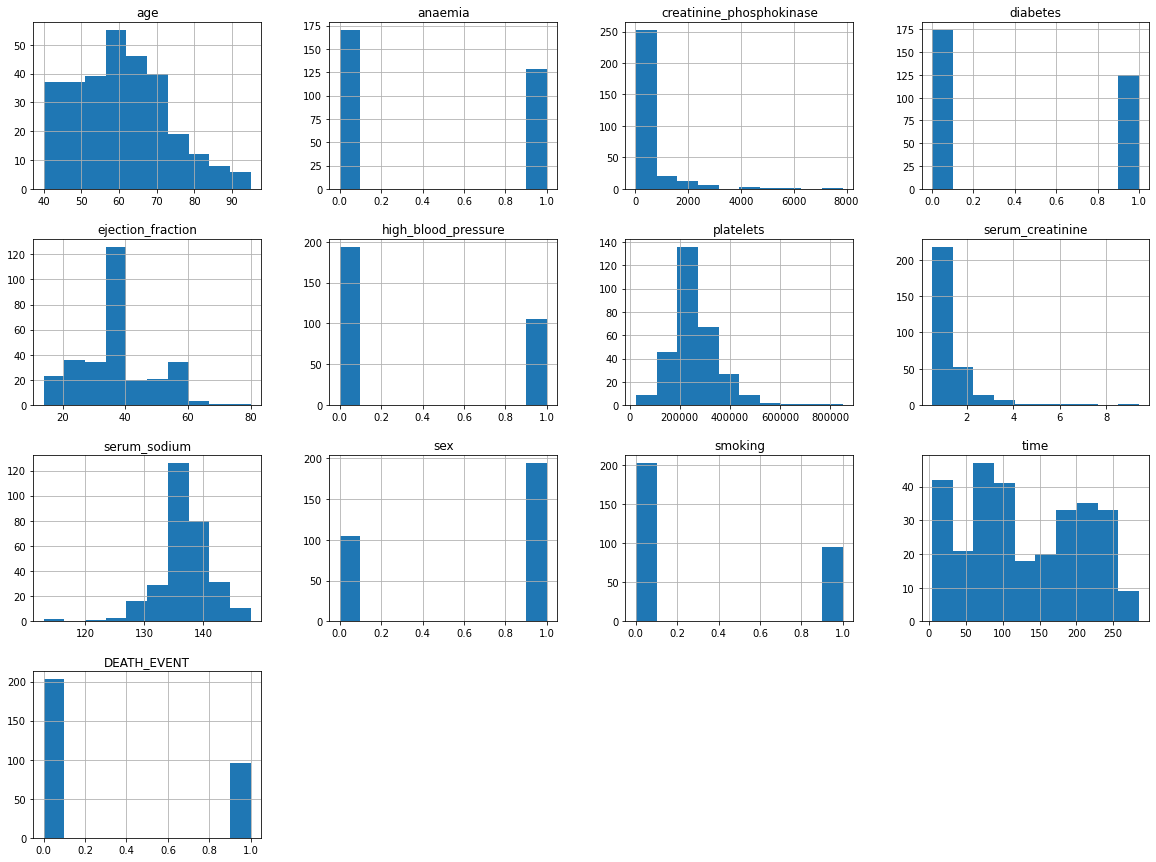

In [12]:
df.hist(bins=10, figsize=(20,15))
plt.show()

In [13]:
#Checking the count of target variable 
df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

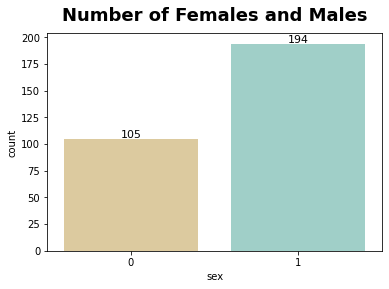

In [14]:
ax = sns.countplot(x="sex",data = df, palette='BrBG');
ax.set_title("Number of Females and Males", y=1.03, fontsize=18, fontweight="bold")
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)

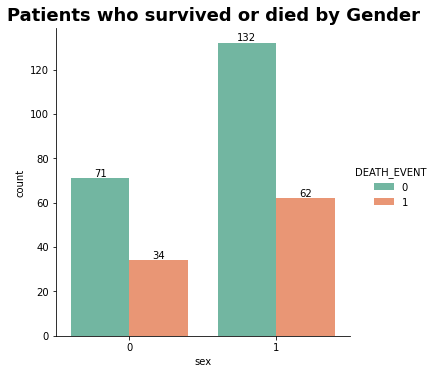

In [15]:
g = sns.catplot(x="sex", kind="count", hue="DEATH_EVENT", data=df, palette="Set2")
g.fig.suptitle("Patients who survived or died by Gender", y=1.03, fontsize=18, fontweight="bold")

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)

# iterate through the axes containers
for c in ax.containers:
    labels = [v.get_height() for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

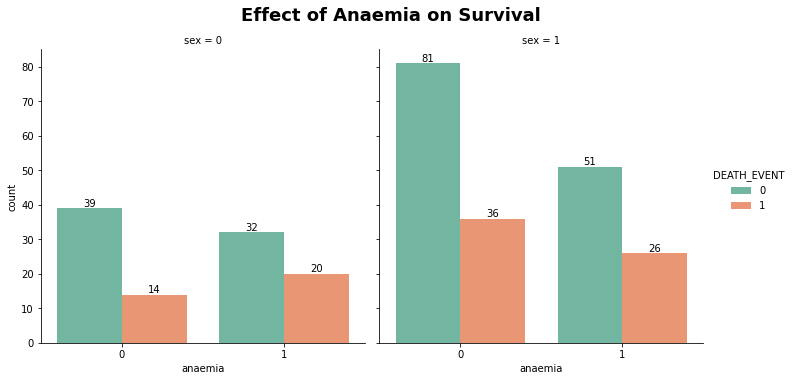

In [16]:
g = sns.catplot(x="anaemia",  kind="count", hue= "DEATH_EVENT", col = "sex", data = df, palette="Set2");
g.fig.suptitle("Effect of Anaemia on Survival", y=1.05, fontsize=18, fontweight="bold")

# iterate through axes
for ax in g.axes.ravel():

    # iterate through the axes containers
    for c in ax.containers:
        labels = [v.get_height() for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')

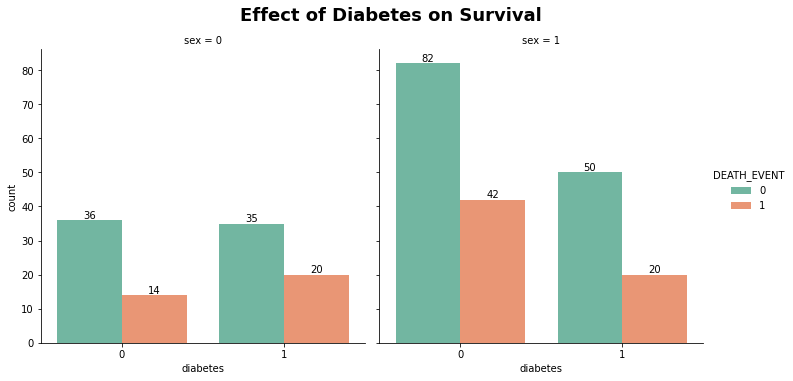

In [17]:
g = sns.catplot(x="diabetes", kind="count",hue="DEATH_EVENT", data = df,col="sex", palette="Set2");
g.fig.suptitle("Effect of Diabetes on Survival", y=1.05, fontsize=18, fontweight="bold")

# iterate through axes
for ax in g.axes.ravel():

    # iterate through the axes containers
    for c in ax.containers:
        labels = [v.get_height() for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')

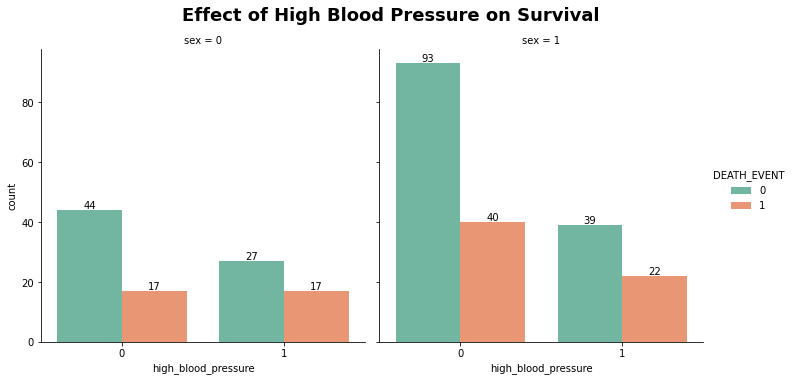

In [18]:
g = sns.catplot(x="high_blood_pressure", kind="count", hue="DEATH_EVENT", col="sex", data = df, palette="Set2");

g.fig.suptitle("Effect of High Blood Pressure on Survival", y=1.05, fontsize=18, fontweight="bold")

# iterate through axes
for ax in g.axes.ravel():

    # iterate through the axes containers
    for c in ax.containers:
        labels = [v.get_height() for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')

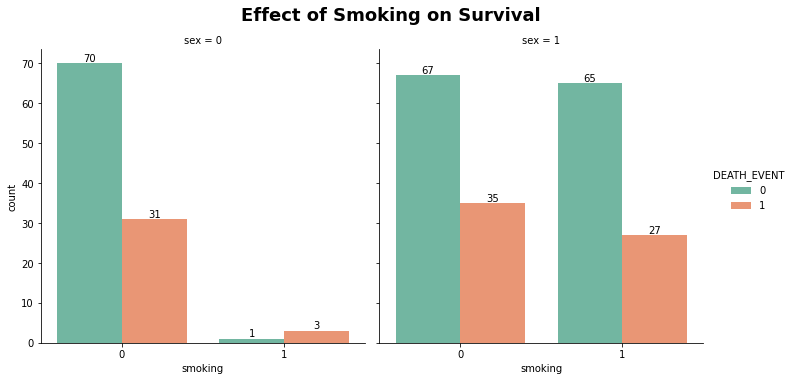

In [19]:
g = sns.catplot(x="smoking", kind="count", hue="DEATH_EVENT", col="sex", data = df, palette="Set2");

g.fig.suptitle("Effect of Smoking on Survival", y=1.05, fontsize=18, fontweight="bold")

# iterate through axes
for ax in g.axes.ravel():

    # iterate through the axes containers
    for c in ax.containers:
        labels = [v.get_height() for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')

In [20]:
x = df.age
hist_data = [x]
group_labels = ['age'] 

fig = ff.create_distplot(hist_data, group_labels)
fig.update_layout(title_text='Age Distribution')
fig.update_xaxes(title_text='Age (years)')
fig.show()


In [21]:
x = df.creatinine_phosphokinase
hist_data = [x]
group_labels = ['Creatinine phosphokinase'] 

fig = ff.create_distplot(hist_data, group_labels, bin_size=40)
fig.update_layout(title_text='Creatinine_phosphokinase Distribution')
fig.update_xaxes(title_text='Creatinine phosphokinase level (mcg/L)')
fig.show()

Creatinine phosphokinase (CPK) is the enzyme that catalyses the reaction leading to the formation of creatinine phosphate. The normal CPK level is considered to be 10-120 mcg/L. Many conditions including heart disease can cause derangement in CPK levels. The distribution of CPK above is right skewed and bimodal.The majority of patients are within 23-122 mcg/L range (normal). Another group of patients are within the 500-600 mg/L level which is 5-6 times the normal range. Another group of patients have abnormally high CPK levels (greater than 1000 mcg/L).

In [22]:
x = df.ejection_fraction
hist_data = [x]
group_labels = ['Ejection Fraction'] 

fig = ff.create_distplot(hist_data, group_labels)
fig.update_layout(title_text='Ejection_fraction Distribution')
fig.update_xaxes(title_text='Ejection fraction (%)')
fig.show()


A normal platelet count ranges from 150 to 450 kiloplatelets/ μl of blood. The majority of patients have platelet levels within this range.

In [27]:
x= df.serum_sodium
hist_data = [x]
group_labels = ['serum_sodium'] 

fig = ff.create_distplot(hist_data, group_labels)
fig.update_layout(title_text='Serum Sodium Distribution')
fig.update_xaxes(title_text='Serum sodium (mEq/L)')
fig.show()


A normal blood sodium level is between 135 and 145 milliequivalents per liter (mEq/L). Congestive heart failure and certain diseases affecting the liver and kidneys can cause fluids to accumulate in the body which dilutes the sodium in the body, lowering the overall level. Most of the patients have a normal serum sodium level but there are some patients who have a lower than normal level.

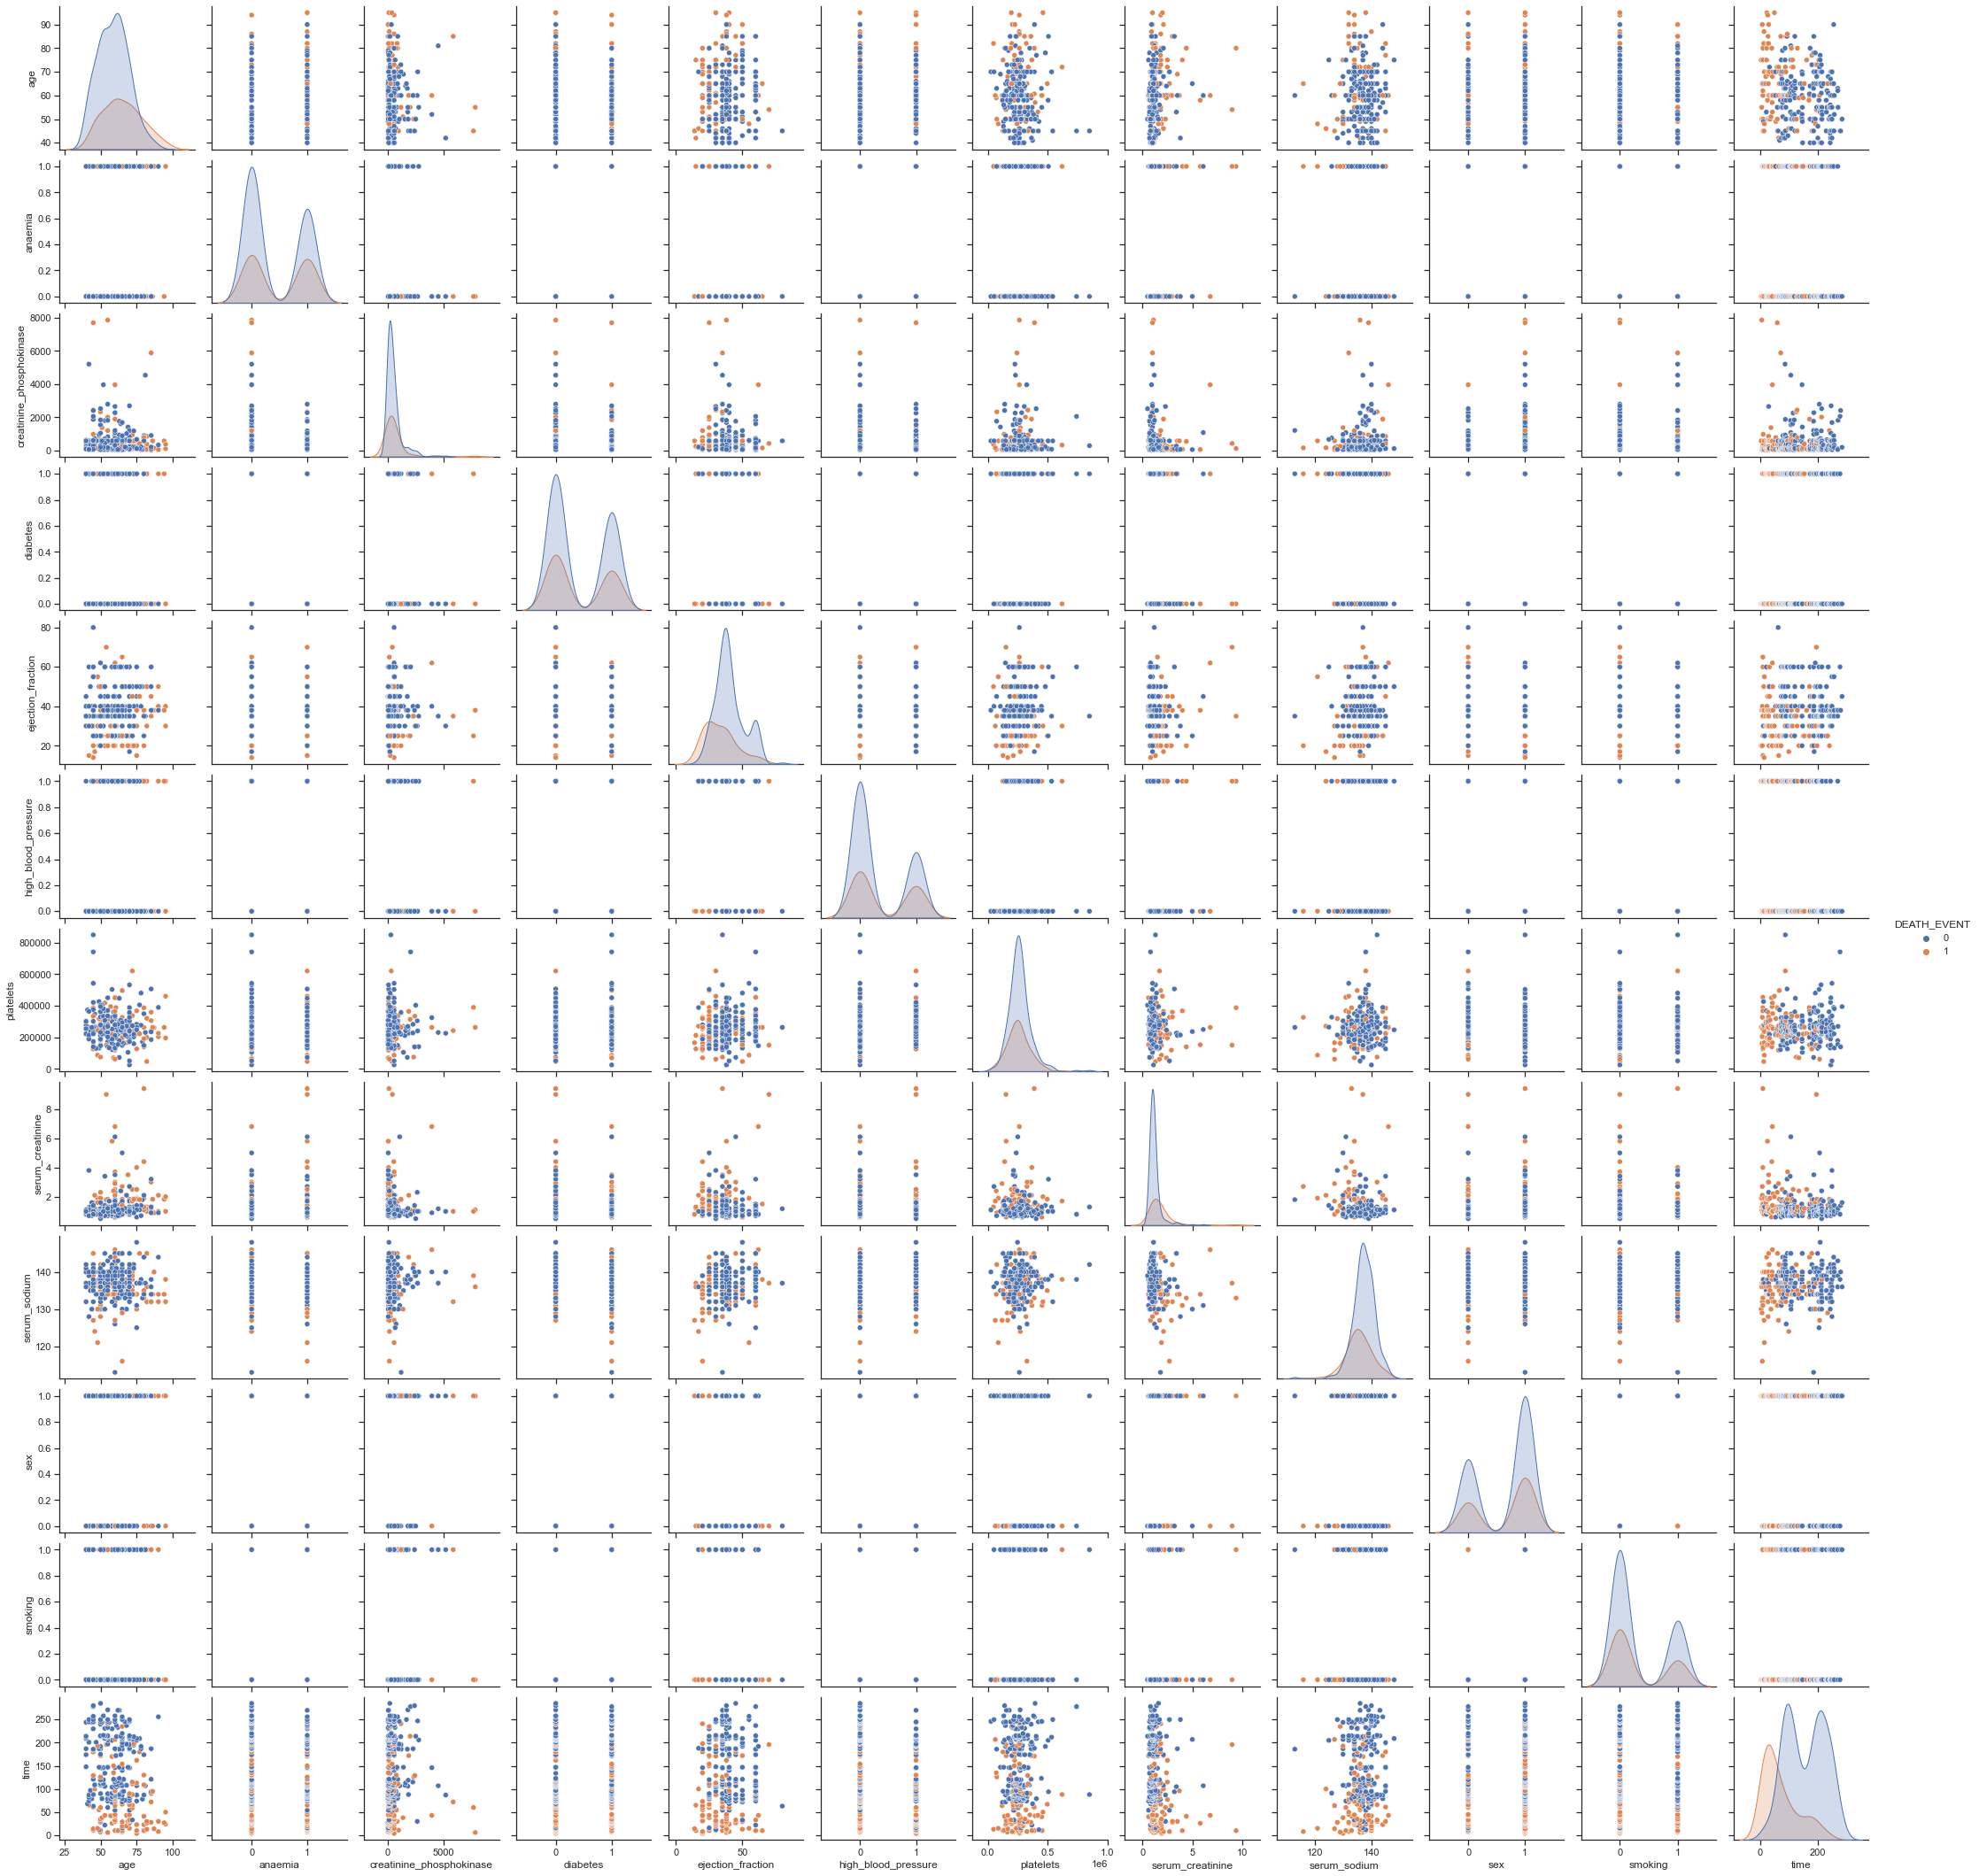

In [24]:
# plotting scatter matrix using seaborn 
sns.set_theme(style="ticks")
sns.pairplot(df, hue='DEATH_EVENT')

<AxesSubplot:>

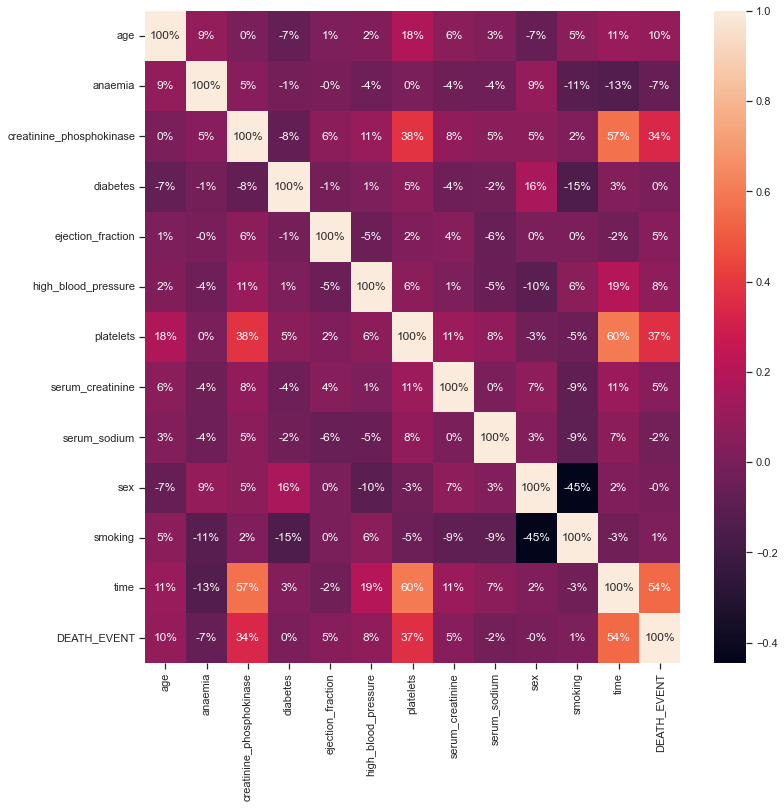

In [25]:
#Checking for the correlation between all variables in the dataset
plt.figure(figsize=(12,12)) #10in by 10in
sns.heatmap(df.apply(lambda x : pd.factorize(x)[0]).corr(method='spearman', min_periods=1), annot=True, fmt='.0%')

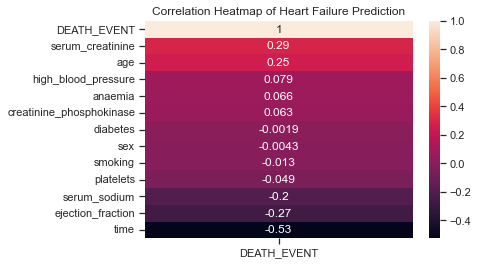

In [26]:
sns.heatmap(df.corr()[['DEATH_EVENT']].sort_values(by='DEATH_EVENT', ascending=False), annot = True)
plt.title('Correlation Heatmap of Heart Failure Prediction')
plt.show()

Age and serum_creatinine are weakly positively correlated with DEATH_EVENT. Anaemia, creatinine_phosphokinase and high blood pressure are also positively correlated (albeit weaker) with the target variable. Ejection fraction and serum sodium are weakly negatively correlated with DEATH_EVENT while the Time variable is highly negatively correlated.

## Part 2: Feature Scaling and Selection

In [30]:
X = df.drop(columns='DEATH_EVENT', axis=1)
Y = df['DEATH_EVENT']

In [31]:
X

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                      1  265000.00               1.9           130    1   
1                      0  263358.03               1.1           136    1   
2                      0  162000.00               1.3           129    1   
3                      0  210000.00               1.9           137    1   
4                      0  327000.00               2.7           116    0   
..                   ...        ...               ...           ...  ...   
294                    1  155000.00               1.1           143    1   
295                    0  270000.00               1.2           139    0   
296                    0  742000.00               0.8           138    0   
297                    0  140000.00               1.4           140    1   
298                    0  395000.00               1.6           136    1   

     smoking  time  
0          0     4  
1          0     6  
2          1     7  
3          0     7  
4          0     8  
..       ...   ...  
294        1   270  
295        0   271  
296        0   278  
297        1   280  
298        1   285  

[299 rows x 12 columns]

In [32]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

### Feature Scaling - MinMax Scaler 

In [33]:
# Scaling the independent variables 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
model=scaler.fit(X)
scaled_data=model.transform(X)

In [34]:
scaled_data=pd.DataFrame(scaled_data,columns=['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'])
scaled_data

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    0.636364      0.0                  0.071319       0.0           0.090909   
1    0.272727      0.0                  1.000000       0.0           0.363636   
2    0.454545      0.0                  0.015693       0.0           0.090909   
3    0.181818      1.0                  0.011227       0.0           0.090909   
4    0.454545      1.0                  0.017479       1.0           0.090909   
..        ...      ...                       ...       ...                ...   
294  0.400000      0.0                  0.004848       1.0           0.363636   
295  0.272727      0.0                  0.229268       0.0           0.363636   
296  0.090909      0.0                  0.259888       1.0           0.696970   
297  0.090909      0.0                  0.304925       0.0           0.363636   
298  0.181818      0.0                  0.022072       0.0           0.469697   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1.0   0.290823          0.157303      0.485714  1.0   
1                    0.0   0.288833          0.067416      0.657143  1.0   
2                    0.0   0.165960          0.089888      0.457143  1.0   
3                    0.0   0.224148          0.157303      0.685714  1.0   
4                    0.0   0.365984          0.247191      0.085714  0.0   
..                   ...        ...               ...           ...  ...   
294                  1.0   0.157474          0.067416      0.857143  1.0   
295                  0.0   0.296884          0.078652      0.742857  0.0   
296                  0.0   0.869075          0.033708      0.714286  0.0   
297                  0.0   0.139290          0.101124      0.771429  1.0   
298                  0.0   0.448418          0.123596      0.657143  1.0   

     smoking      time  
0        0.0  0.000000  
1        0.0  0.007117  
2        1.0  0.010676  
3        0.0  0.010676  
4        0.0  0.014235  
..       ...       ...  
294      1.0  0.946619  
295      0.0  0.950178  
296      0.0  0.975089  
297      1.0  0.982206  
298      1.0  1.000000  

[299 rows x 12 columns]

### Feature Selection- Recursive feature elimination method

In [75]:
### Wrapper Method for Feature Selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
feat=10
model_lr = LogisticRegression()
selector = RFE(model_lr)
selector = selector.fit(X_train, Y_train)
selector_ind = selector.get_support()
xref = X_train.iloc[:, selector_ind]
print(xref.columns)
selector.n_features_

Index(['age', 'creatinine_phosphokinase', 'ejection_fraction',
       'serum_creatinine', 'serum_sodium', 'time'],
      dtype='object')


6

In [80]:
X_scaled=scaled_data.iloc[:,[0,2,4,7,8,11]]
X_scaled

age  creatinine_phosphokinase  ejection_fraction  serum_creatinine  \
0    0.636364                  0.071319           0.090909          0.157303   
1    0.272727                  1.000000           0.363636          0.067416   
2    0.454545                  0.015693           0.090909          0.089888   
3    0.181818                  0.011227           0.090909          0.157303   
4    0.454545                  0.017479           0.090909          0.247191   
..        ...                       ...                ...               ...   
294  0.400000                  0.004848           0.363636          0.067416   
295  0.272727                  0.229268           0.363636          0.078652   
296  0.090909                  0.259888           0.696970          0.033708   
297  0.090909                  0.304925           0.363636          0.101124   
298  0.181818                  0.022072           0.469697          0.123596   

     serum_sodium      time  
0        0.485714  0.000000  
1        0.657143  0.007117  
2        0.457143  0.010676  
3        0.685714  0.010676  
4        0.085714  0.014235  
..            ...       ...  
294      0.857143  0.946619  
295      0.742857  0.950178  
296      0.714286  0.975089  
297      0.771429  0.982206  
298      0.657143  1.000000  

[299 rows x 6 columns]

In [81]:
# Splitting the data into Training data & Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=2,stratify=Y)

## Part 3: Modeling and Model Comparison 

In [82]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

### 1. Logistic Regression

In [107]:
clf = LogisticRegression(random_state=1)
clf.fit(X_train, Y_train)

y_pred = clf.predict(X_test)

cm = confusion_matrix(Y_test,y_pred)
print(cm)

accuracy_LR = accuracy_score(Y_test, y_pred)
print(accuracy)

# applying k-fold cross validation
accuracies = cross_val_score(estimator = clf, X = X_train, y = Y_train, cv = 10) 
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[39  2]
 [ 8 11]]
0.85
Accuracy: 83.26 %
Standard Deviation: 6.18 %


In [84]:
pd.DataFrame(cm,columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

Predicted No  Predicted Yes
Actual No             39              2
Actual Yes             8             11

### 2. K Nearest Neighbours

In [85]:
# K Nearest Neighbours
clf = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
clf.fit(X_train, Y_train)

y_pred = clf.predict(X_test)

cm = confusion_matrix(Y_test,y_pred)
print(cm)
accuracy = accuracy_score(Y_test, y_pred)
print(accuracy)

# applying k-fold cross validation
accuracies = cross_val_score(estimator = clf, X = X_train, y = Y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[39  2]
 [ 5 14]]
0.8833333333333333
Accuracy: 82.01 %
Standard Deviation: 3.73 %


In [86]:
pd.DataFrame(cm,columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

Predicted No  Predicted Yes
Actual No             39              2
Actual Yes             5             14

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### 3. Kernel SVM 

In [88]:
# Kernel SVM
clf = SVC(kernel = 'rbf', random_state=1)
clf.fit(X_train, Y_train)

y_pred = clf.predict(X_test)

cm = confusion_matrix(Y_test,y_pred)
print(cm)
accuracy = accuracy_score(Y_test, y_pred)
print(accuracy)

# applying k-fold cross validation
accuracies = cross_val_score(estimator = clf, X = X_train, y = Y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[38  3]
 [ 8 11]]
0.8166666666666667
Accuracy: 83.68 %
Standard Deviation: 6.03 %


In [89]:
pd.DataFrame(cm,columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

Predicted No  Predicted Yes
Actual No             38              3
Actual Yes             8             11

### 4. Naive Bayes Classification

In [90]:
# Naive Bayes
clf = GaussianNB()
clf.fit(X_train, Y_train)

y_pred = clf.predict(X_test)

cm = confusion_matrix(Y_test,y_pred)
print(cm)
accuracy = accuracy_score(Y_test, y_pred)
print(accuracy)

# applying k-fold cross validation
accuracies = cross_val_score(estimator = clf, X = X_train, y = Y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[38  3]
 [12  7]]
0.75
Accuracy: 76.99 %
Standard Deviation: 5.94 %


In [91]:
pd.DataFrame(cm,columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

Predicted No  Predicted Yes
Actual No             38              3
Actual Yes            12              7

### 5. Decision Tree

In [108]:
# Decision Tree
clf = DecisionTreeClassifier(criterion = 'entropy', random_state=1)
clf.fit(X_train, Y_train)

y_pred = clf.predict(X_test)

cm = confusion_matrix(Y_test,y_pred)
print(cm)
accuracy = accuracy_score(Y_test, y_pred)
print(accuracy)

# applying k-fold cross validation
accuracies = cross_val_score(estimator = clf, X = X_train, y = Y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[38  3]
 [10  9]]
0.7833333333333333
Accuracy: 78.64 %
Standard Deviation: 5.81 %


In [93]:
pd.DataFrame(cm,columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

Predicted No  Predicted Yes
Actual No             38              3
Actual Yes            10              9

### 6. Random Forest Classifier

In [100]:
# Random Forest Classifier
clf = RandomForestClassifier(random_state=1)
clf.fit(X_train, Y_train)

y_pred = clf.predict(X_test)

cm = confusion_matrix(Y_test,y_pred)
print(cm)
accuracy = accuracy_score(Y_test, y_pred)
print(accuracy)

# applying k-fold cross validation
accuracies = cross_val_score(estimator = clf, X = X_train, y = Y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[37  4]
 [ 5 14]]
0.85
Accuracy: 83.26 %
Standard Deviation: 4.57 %


In [101]:
pd.DataFrame(cm,columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

Predicted No  Predicted Yes
Actual No             37              4
Actual Yes             5             14

The models seems to perform well with certain random_state. To give a realistic performance, k-fold cross validation has been applied to all models with average accuracy and standard deviation between all accuracies. This should give a better understanding of the performance of the model.

As we can see, SVC Kernel has a better average accuracy with a lower standard deviation. So we will choose that as our preferred model.